## Análise entre COVID19 e H1N1


In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt

### Carregar valores sobre o H1N1
Carrega os dados gerais (casos confirmados e mortes por país) sobre a pandemia do h1n1 e coloca-os numa tabela.

In [2]:
import numpy as np
import re
#Teste para a data do h1n1
#Infelizmente não há data praticamente nenhuma
pd.set_option('display.max_rows', None)
url = 'https://en.wikipedia.org/wiki/2009_swine_flu_pandemic_by_country'
tables = pd.read_html(url)
h1n1 = tables[0]
h1n1.columns = h1n1.columns.get_level_values(0)
h1n1 = h1n1.drop(columns=['Indicators/', "Unnamed: 8_level_0"])
h1n1 = h1n1.head(60) #Eliminate countries with less than 40 deaths
h1n1 = h1n1.dropna()

h1n1 = h1n1.iloc[1:]
h1n1=h1n1.replace(to_replace = "(,)|\(|\)|(\[.*?\]|~|\+|#|\^)",value="",regex=True )
h1n1=h1n1.replace(to_replace = "(China mainland)",value=r"China",regex=True )
#h1n1.to_csv("h1n1.csv")
h1n1=h1n1.replace(to_replace = "United States",value=r"US",regex=True )
h1n1=h1n1.replace(to_replace = "South Korea",value=r"Korea, South",regex=True )
h1n1['Cases'] = h1n1['Cases'].astype(float)
h1n1['Deaths'] = h1n1['Deaths'].astype(float)
h1n1.reset_index(drop=True, inplace=True)
h1n1

,Country,Cases,Deaths
0,US,113690.0,3433.0
1,Brazil,58178.0,2135.0
2,India,33783.0,2024.0
3,Mexico,70715.0,1316.0
4,China,120940.0,800.0
5,Turkey,12316.0,656.0
6,Argentina,11458.0,626.0
7,Russia,25339.0,604.0
8,United Kingdom,28456.0,474.0
9,Canada,25828.0,429.0


### Carregar valores sobre o Covid19
Carrega os dados sobre a pandemia do covid19. Cria duas tabela: uma com as infeções por país e outra com as mortes por país

In [3]:
##Covid infetados
covid_infected = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
covid_infected = covid_infected.drop(columns=['Province/State', 'Lat',"Long"])
covid_infected = covid_infected.groupby(['Country/Region'],as_index = False).sum()
covid_infected = covid_infected.rename(columns={"Country/Region":"Country"}, errors="raise")
covid_infected.head()
#covid_infected

##Covid mortes
covid_deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
covid_deaths = covid_deaths.drop(columns=['Province/State', 'Lat',"Long"])
covid_deaths = covid_deaths.groupby(['Country/Region'],as_index = False).sum()
covid_deaths = covid_deaths.rename(columns={"Country/Region":"Country"}, errors="raise")
covid_deaths.head()
covid_deaths

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,68
1,Albania,0,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,31
2,Algeria,0,0,0,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,453
3,Andorra,0,0,0,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,43
4,Angola,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
5,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
6,Argentina,0,0,0,0,0,0,0,0,0,...,152,165,176,185,192,197,207,214,218,225
7,Armenia,0,0,0,0,0,0,0,0,0,...,24,24,27,28,28,29,30,30,32,33
8,Australia,0,0,0,0,0,0,0,0,0,...,67,75,79,80,83,83,89,91,93,93
9,Austria,0,0,0,0,0,0,0,0,0,...,510,522,530,536,542,549,569,580,584,589


Função para encontrar o dia em que foi encontrado o primeiro infetado/morto

In [4]:
def find_firstcase(df):
    first_infected = {}
    for row in covid_infected.iloc:
        for i in range(1,100):
            if (row[i] != 0):
                first_infected[row[0]] = i
                break
    return first_infected          

Cria 2 tabelas com os 10 países com mais infetados do COVID e do H1N1

In [5]:
#Countries
european_countries = ['Italy', 'Germany', 'France', 'Spain', 'United Kingdom', 
                      'Portugal']
top10_infected_countries_covid = []

last_column = list(covid_infected.columns)
last_column = last_column[-1]
top10_infected_countries_covid = covid_infected.sort_values(by=[last_column], ascending=False)
top10_infected_countries_covid = top10_infected_countries_covid.head(10)
top10_infected_countries_covid.reset_index(drop=True, inplace=True)
top10_infected_countries_covid

top10_infected_countries_h1n1 = []

top10_infected_countries_h1n1 = h1n1.sort_values(by=["Cases"], ascending=False)
top10_infected_countries_h1n1 = top10_infected_countries_h1n1.head(10)
top10_infected_countries_h1n1.reset_index(drop=True, inplace=True)
top10_infected_countries_h1n1


,Country,Cases,Deaths
0,Italy,3064933.0,244.0
1,France,1980000.0,344.0
2,Germany,222360.0,258.0
3,Portugal,166922.0,122.0
4,China,120940.0,800.0
5,US,113690.0,3433.0
6,"Korea, South",107939.0,250.0
7,Mexico,70715.0,1316.0
8,Brazil,58178.0,2135.0
9,Australia,37484.0,187.0


Função para desenhar um grafico de barras

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#Função para dar plot da comparação entre virus
def plotbar_virus_vs_virus(df_top10,df_other,columnName, ColumnPos,label1,label2,title,xlabel,ylabel):
    n_groups = 10
    top10country_names = np.array(df_top10["Country"].values)
    values_v1 = np.array(df_top10[columnName].values)
    values_v2 = []
    
    for country in top10country_names:
        c = df_other.loc[(df_other.Country == country)]
        if (len(c) == 0):
            print(country)
            continue 
        last_value = float(c.values[0][ColumnPos])
        values_v2.append(last_value)


    # create plot
    fig, ax = plt.subplots(figsize=(12, 8))
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, values_v1, bar_width,
    alpha=opacity,
    color='r',
    label=label1)

    rects2 = plt.bar(index + bar_width, values_v2, bar_width,
    alpha=opacity,
    color='b',
    label=label2)

    fmt=matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
    #fmt.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
    #fmt.set_scientific(False)
    ax.yaxis.set_major_formatter(fmt)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(index + bar_width, top10country_names)
    plt.legend()

    plt.tight_layout()
    plt.show()
    

## Gráfico entre COVID19 e H1N1
Gráfico de barras que compara o número de infetados dos 10 países com o maior número de infetados de COVID19 com o número de infetados destes países pelo H1N1

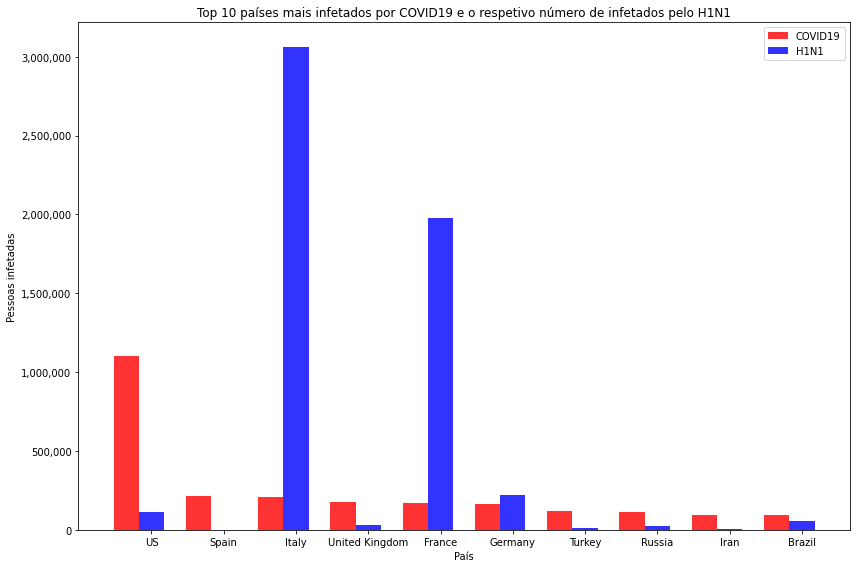

In [7]:
##Plot de um gráfico de barras com os número de infetados de covid dos 10 paises mais infetados com os valores
##de infetados de H1N1 nos respetivos paises
plotbar_virus_vs_virus(top10_infected_countries_covid,h1n1,last_column,-2,"COVID19","H1N1",
                       'Top 10 países mais infetados por COVID19 e o respetivo número de infetados pelo H1N1',
                       'País','Pessoas infetadas')

## Gráfico entre COVID19 e H1N1
Gráfico que compara o número de mortes dos 10 países com o maior número de infetados de COVID19 e indica quanto tempo (desde a primeira morte) demorou o COVID a ultrapassar o número de mortes causadas pelo H1N1.

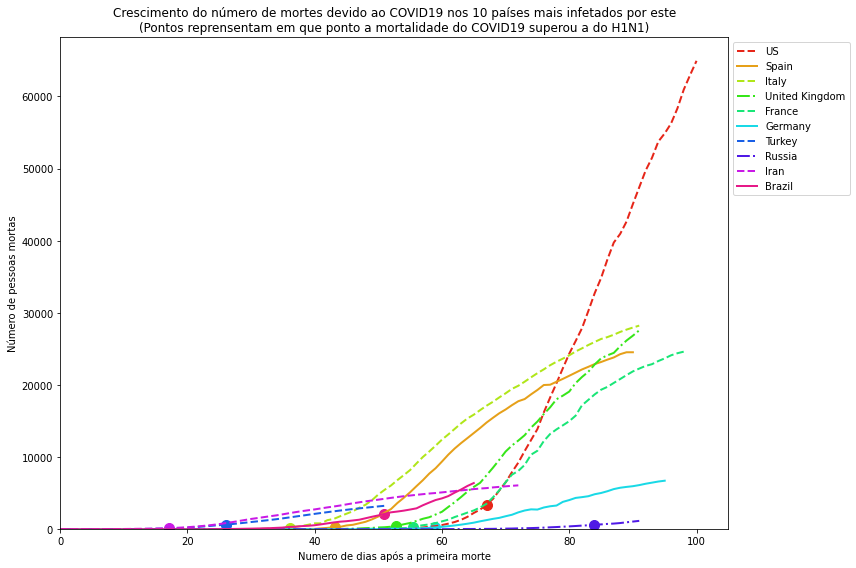

In [8]:
import shapely.geometry as SG

def plot_countries(df, dic, countries, ls):
    for country in countries:
        c = df.loc[(df.Country == country)]
        if (len(c) == 0):
            continue
            
        ar = c.iloc[0].to_numpy()
        ar = ar[dic[country]:]
        x = range(0,len(ar))
        #print(country + " " + str(len(x)))
        plt.plot(x,ar, linestyle=ls[-1],linewidth=2, markersize=1, label=country)
        ls.pop()
        ##Annotate H1N1 total infected in said country
        h1n1_deaths = h1n1.loc[(h1n1.Country == country)]
        if (len(h1n1_deaths) == 0):
            continue
        #yval = np.empty(len(ar)) 
        yval = (float(h1n1_deaths.values[0][2]))
        
        line = SG.LineString(list(zip(x,ar)))
        y0 = yval
        yline = SG.LineString([(0, y0), (100, y0)])
        coords = np.array(line.intersection(yline))
        if (len(coords) > 0):
            ax.scatter(coords[0], coords[1], s=100)

      
sns.set_palette(sns.hls_palette(10, l=.5, s=.8)) # 8 countries max
fig, ax = plt.subplots(figsize=(12, 8))

ls = ["-", "--","-.","--","-", "--","-.","--","-", "--"]
top10country_names = np.array(top10_infected_countries_covid["Country"].values)
first_death = find_firstcase(covid_deaths)
plot_countries(covid_deaths,first_death,top10country_names,ls )

ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
plt.xlabel('Numero de dias após a primeira morte')
plt.ylabel('Número de pessoas mortas')
plt.title('Crescimento do número de mortes devido ao COVID19 nos 10 países mais infetados por este\n(Pontos reprensentam em que ponto a mortalidade do COVID19 superou a do H1N1)')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()


Como podemos analisar nestes ultimos dois gráficos, os 10 países mais infetados pelo COVID não tiveram tantas infeções pelo H1N1, tirando a França e a Itália, que tiverem um grande número de infetados.
No 2º gráfico vemos que mesmo em países aonde o H1N1 teve um número alto de infetados, o número de mortes causadas pelo COVID é muito superior (e a barra dos EUA não para de crescer).

## Gráfico entre H1N1 e COVID19
Gráfico de barras que compara o número de infetados dos 10 países que tiveram maior número de infetados de H1N1 com o número de infetados destes países pelo COVID19

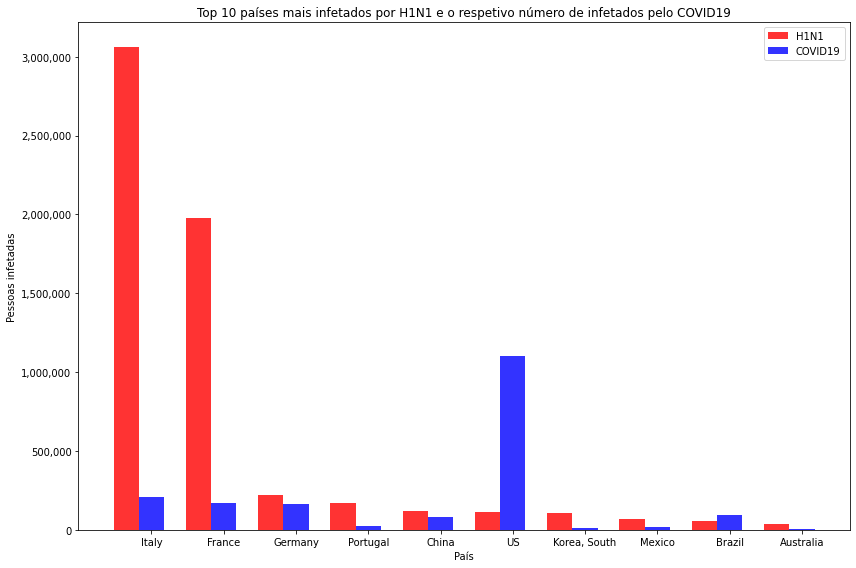

In [9]:
##Plot de um gráfico de barras com os número de infetados de h1n1 dos 10 paises mais infetados com os valores
##de infetados de covid nos respetivos paises
    
plotbar_virus_vs_virus(top10_infected_countries_h1n1,covid_infected,"Cases",-1,"H1N1","COVID19",
                       'Top 10 países mais infetados por H1N1 e o respetivo número de infetados pelo COVID19',
                       'País','Pessoas infetadas')

Este gráfico compara o número de mortes por COVID dos 10 países que tiveram o maior número de infetados por H1N1 e indica quanto tempo (desde a primeira morte) demorou o COVID a ultrapassar o número de mortes causadas pelo H1N1.

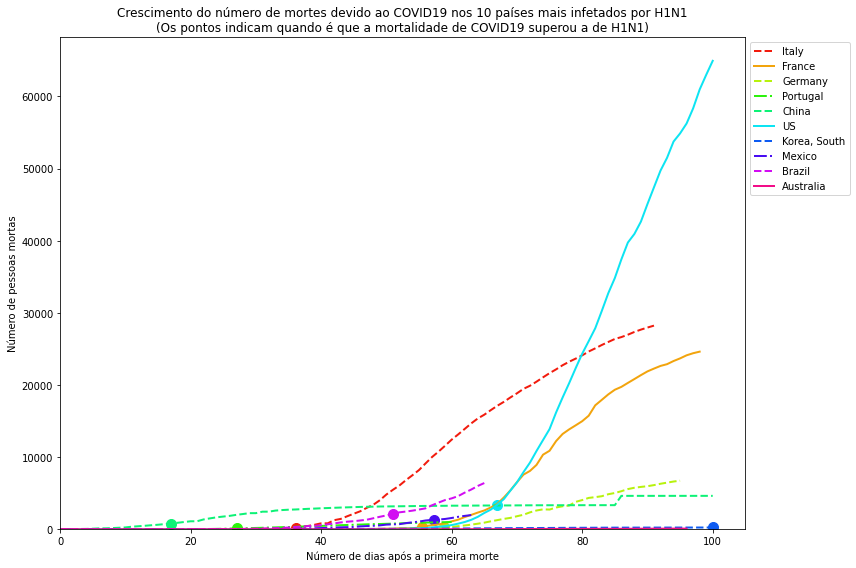

In [10]:
sns.set_palette(sns.hls_palette(10, l=.5, s=.9)) # 8 countries max
fig, ax = plt.subplots(figsize=(12, 8))

ls = ["-", "--","-.","--","-", "--","-.","--","-", "--"]
top10country_names = np.array(top10_infected_countries_h1n1["Country"].values)
first_death = find_firstcase(covid_deaths)
plot_countries(covid_deaths,first_death,top10country_names,ls )

ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
plt.xlabel('Número de dias após a primeira morte')
plt.ylabel('Número de pessoas mortas')
plt.title('Crescimento do número de mortes devido ao COVID19 nos 10 países mais infetados por H1N1\n(Os pontos indicam quando é que a mortalidade de COVID19 superou a de H1N1)')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

Vemos que tirando a França e a Itália, mais nenhum país teve um número muito alto de infetados pelo H1N1, sendo que o número de infetados pelo COVID já ultrapassou na maioria dos países.
Podemos no entanto ver que Portugal foi um dos países mais afetados pelo H1N1, mas o número de infetados pelo COVID é bastante reduzido (apesar de o número de mortes já ser superior)

### Mapas do mundo com os infetados

In [11]:
import sys
import os
import qgis
import ogr
os.environ['QT_QPA_PLATFORM'] = 'offscreen'
sys.path.insert(0,'/usr/local/share/qgis/python')
from qgis.core import *
QgsApplication.setPrefixPath("/usr/local", True) 
from qgis.gui import *
from qgis import processing

from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice
                

qgs = QgsApplication([], False)
qgs.initQgis()

In [12]:
covid_gpkg = "data/covidmap.gpkg"
conn = ogr.Open(covid_gpkg)
for i in conn:
    vlayer = QgsVectorLayer("{}|layername={}".format(covid_gpkg, i.GetName()), i.GetName(), "ogr")
    if not vlayer.isValid():
        print("Layer {} failed to load".format(i.GetName()))
    else:
        QgsProject.instance().addMapLayer(vlayer)
        print("Layer {} loaded".format(i.GetName()))
        
h1n1_gpkg = "data/h1n1map.gpkg"
conn = ogr.Open(h1n1_gpkg)
for i in conn:
    vlayer = QgsVectorLayer("{}|layername={}".format(h1n1_gpkg, i.GetName()), i.GetName(), "ogr")
    if not vlayer.isValid():
        print("Layer {} failed to load".format(i.GetName()))
    else:
        QgsProject.instance().addMapLayer(vlayer)
        print("Layer {} loaded".format(i.GetName()))

Layer covidmap loaded
Layer layer_styles loaded
Layer h1z1 loaded
Layer layer_styles loaded


In [13]:
country = QgsProject.instance().mapLayersByName("covidmap")[0]
country_h1n1 = QgsProject.instance().mapLayersByName("h1z1")[0]
#for c in country.getFeatures():
    #c["4/30/20_sum"] = 0
#for c in country.getFeatures():
#    print(c)
#for c in country.getFeatures():
#        print("Em {} há {} caso(s) confirmados".format(c["concelho"], c["confirmados_concelho_20/04/2020"]))

In [14]:
xt = country.extent()
# print(xt)
width  = 1000
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([country])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

Gerar mapa com 1000 por 482


### Mapa do mundo com o número de infetados por COVID

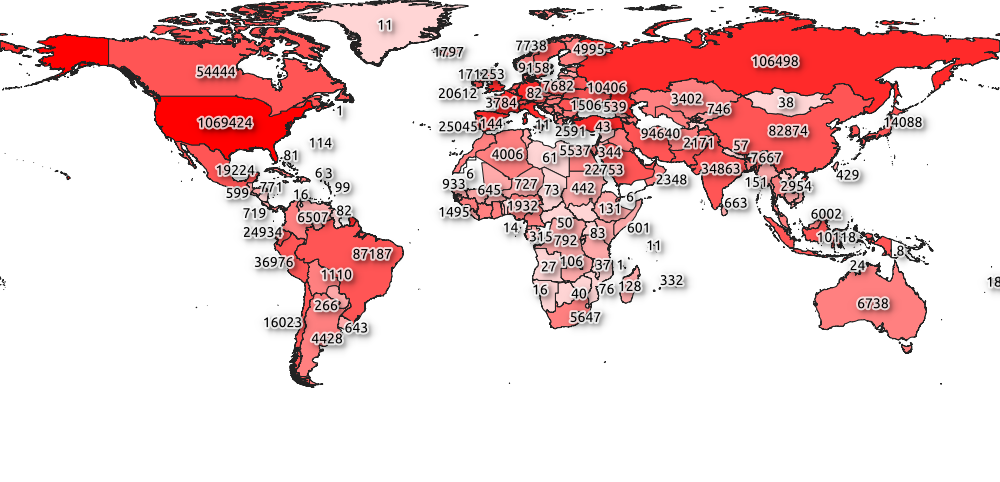

In [15]:
from IPython.display import Image
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
Image( imgbuf.data() )

In [16]:
xt = country_h1n1.extent()
# print(xt)
width  = 1000
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([country_h1n1])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

Gerar mapa com 1000 por 482


### Mapa do mundo com o número de infetados por H1N1
Infelizmente, devido à má formatação dos dados e ao facto que muitos países nem tem muitos dados relativamente ao H1N1, o mapa está bastante desfigurado. Mesmo assim conseguimos ver alguns pontos de foco do H1N1, como Itália, França, China e Brasil. 


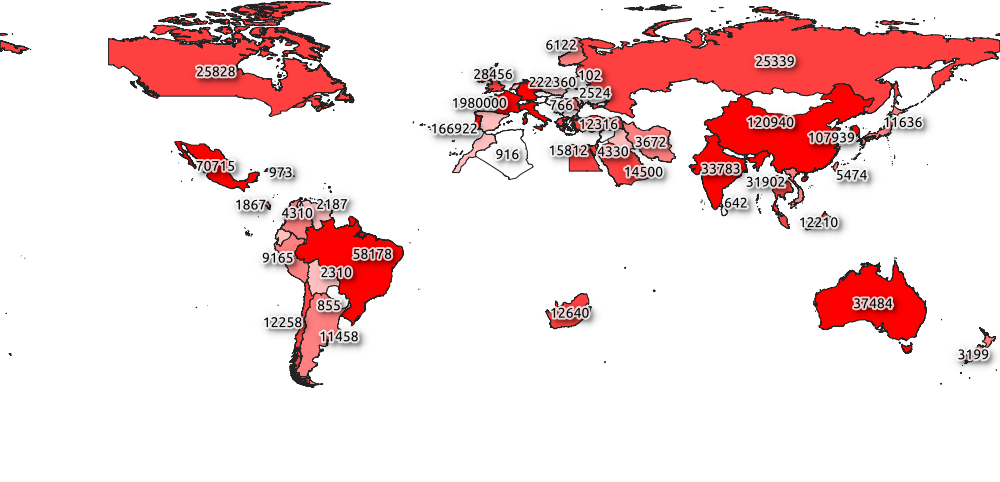

In [17]:
from IPython.display import Image
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
Image( imgbuf.data() )